# Exercise 8: Put all the concepts in Exercise 7 together

Skills:
* Apply all the concepts covered in Exercise 7 for a research question. Know when to use what concept.

References: 
* Exercise 7


### To Do

Narrow down the list of rail routes in CA to 3 groups. Use the SHN network to determine how much of the rail route runs near the SHN. We care only about rail routes that run entirely in CA (use stops to figure this out).

**Near** the interstate, US highway, or state highway is defined by being within a quarter mile. For this exercise, the distinction between interstate, US highway, and state highway is not important; treat any road that shows up in the dataset as "the SHN".

There are theoretically 3 groupings: 
* rail routes that are never within 0.25 miles of the SHN (>0.25
* rail routes with > 0 but less than half of its length near the SHN (0<x<0.5)
* rail routes with at least half of its length near the SHN(

Provide a table and a chart showing how many rail routes fall into each of the 3 groups by district.

Use a Markdown cell at the end to connect which geospatial concept was applied to which step of the process. The concepts that should be used are `projecting CRS`, `buffering`, `dissolve`, `clipping`, `spatial join`, `overlay`. 

---
## Notes
* all imported dfs are gdf 
* all with CRS 4326 (decimal degrees)
* all with active geometry col set to `geometry`
* all gdf filtered down to rail groups 0, 1 and 2
* geometry type for each gdf
    1. districts - polygon
    2. highways - multi line string
    3. routes - line string
    4. rail_routes - line string
    5. stops - point
    6. rail_stops - point
* check the plots of all the gdfs
* gdf not in CA
    1. routes (nationwide)
    2. rail routes (nationwide)
    3. stops 
    4. rail stops 
---
## Cleaning
* project all gdf to "EPSG:2229" to get everything in feet
* subset/filter all gdf to California only
    1. dissolve districts map to be CA only.
    2. overlay CA map over the other gdf to get a CA only version of those maps
    
---
## Breakdown of steps
    1. overlay route maps over the CA maps
    2. Then overay stops map over the previous map
    

### Narrow down the list of rail routes in CA to 3 groups
* COMPLETE
* print whats in `rail_routes`
* check value counts to ensure there are 3 


### Use the SHN network to determine how much of the rail route runs near the SHN (<.25 miles)
* will need to overlay some geometry
   * need: 
       1. CA rail routes map, buffered to .25 miles (or 1320ft)
       2. CA highway map
       3. bound to CA map?
       
   * steps:
       1. overlay buffered rail routes on top of CA highway map
       2. find some calculation/interection that finds if rail routes interect CA highway 


### (identify) rail routes that run entirely in CA (use stops to figure this out)
* some mix of clipping, spatial join and overlay
* 
* 
---

In [1]:
import geopandas as gpd
import intake
import pandas as pd

catalog = intake.open_catalog(
    "../_shared_utils/shared_utils/shared_data_catalog.yml")

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
/tmp/ipykernel_578/1769798718.py:1: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling P

In [2]:
# Import data
districts = catalog.caltrans_districts.read()
highways = catalog.state_highway_network.read()

rail_group = ['0', '1', '2']
routes = catalog.ca_transit_routes.read()
rail_routes = routes[routes.route_type.isin(rail_group)
                    ].reset_index(drop=True)

stops = catalog.ca_transit_stops.read()
rail_stops = stops[stops.route_type.isin(rail_group)
                  ].reset_index(drop=True)

---

## Dataframe checks

---

In [ ]:
#checked the CRS for all imported data, they all have EPSG: 4326

# districts.crs, highways.crs, routes.crs, rail_routes.crs, stops.crs, rail_stops.crs

In [42]:
#gdf of caltrans districts

print(type(districts))
print(districts.shape)
print(districts.geometry.name)
districts.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
(12, 6)
geometry


,OBJECTID,DISTRICT,Region,Shape__Area,Shape__Length,geometry
0,1,1,North,4.659910e+10,1.644579e+06,"POLYGON ((-123.51781 42.00076, -123.51793 42.0..."
1,2,2,North,1.266950e+11,1.775639e+06,"POLYGON ((-122.30409 42.00835, -122.34369 42.0..."
2,3,3,North,5.458748e+10,1.468290e+06,"POLYGON ((-121.40482 40.13005, -121.40482 40.1..."
3,4,4,,3.383387e+10,1.291122e+06,"POLYGON ((-122.38960 38.85632, -122.38980 38.8..."
4,5,5,Central,4.853090e+10,1.380598e+06,"POLYGON ((-121.21407 36.95981, -121.21906 36.9..."


<AxesSubplot:>

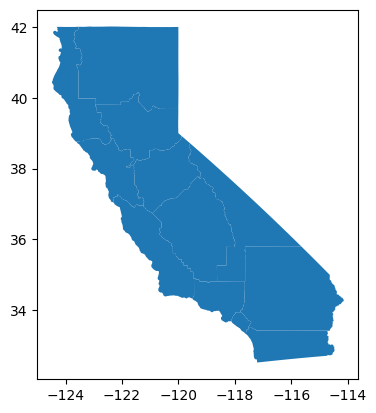

In [51]:
districts.plot()

In [26]:
#gdf of CA highways
print(type(highways))
print(highways.shape)
print(highways.geometry.name)
highways.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
(1052, 6)
geometry


,Route,County,District,RouteType,Direction,geometry
0,1,LA,7,State,NB,"MULTILINESTRING ((-118.14322 33.79010, -118.14..."
1,1,LA,7,State,SB,"MULTILINESTRING ((-118.39630 33.94454, -118.39..."
2,1,MEN,1,State,NB,"MULTILINESTRING ((-123.81956 39.79816, -123.81..."
3,1,MEN,1,State,SB,"MULTILINESTRING ((-123.79591 39.69252, -123.79..."
4,1,MON,5,State,NB,"MULTILINESTRING ((-121.76641 36.77189, -121.76..."


<AxesSubplot:>

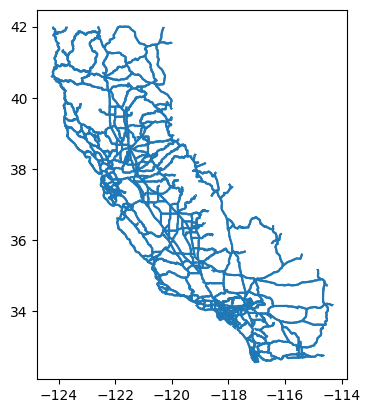

In [52]:
highways.plot()

In [6]:
rail_group

['0', '1', '2']

In [27]:
#gdf of all routes, nation wide?
print(type(routes))
print(routes.shape)
print(routes.geometry.name)
print(value
routes.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
(7161, 10)
geometry


,org_id,agency,route_id,route_type,route_name,shape_id,n_trips,base64_url,uri,geometry
0,recNaKvzVQhGX1puu,City of Alhambra,BlueLine,3,Blue Line,p_901543,17,aHR0cHM6Ly9naXRodWIuY29tL0xBQ01UQS9sb3MtYW5nZW...,https://github.com/LACMTA/los-angeles-regional...,"LINESTRING (-118.16836 34.06329, -118.16895 34..."
1,recNaKvzVQhGX1puu,City of Alhambra,BlueLine,3,Blue Line,p_901544,18,aHR0cHM6Ly9naXRodWIuY29tL0xBQ01UQS9sb3MtYW5nZW...,https://github.com/LACMTA/los-angeles-regional...,"LINESTRING (-118.12344 34.09633, -118.12347 34..."
2,recNaKvzVQhGX1puu,City of Alhambra,GreenLine,3,Green Line,p_901545,33,aHR0cHM6Ly9naXRodWIuY29tL0xBQ01UQS9sb3MtYW5nZW...,https://github.com/LACMTA/los-angeles-regional...,"LINESTRING (-118.11131 34.07941, -118.11131 34..."
3,recNaKvzVQhGX1puu,City of Alhambra,GreenLine,3,Green Line,p_901546,33,aHR0cHM6Ly9naXRodWIuY29tL0xBQ01UQS9sb3MtYW5nZW...,https://github.com/LACMTA/los-angeles-regional...,"LINESTRING (-118.11159 34.07916, -118.11175 34..."
4,recSBFiK95hJnJuYx,Amador Regional Transit System,569,3,Sacramento,p_859,2,aHR0cHM6Ly9kYXRhLnRyaWxsaXVtdHJhbnNpdC5jb20vZ3...,https://data.trilliumtransit.com/gtfs/amador-c...,"LINESTRING (-120.80805 38.38005, -120.80799 38..."


<AxesSubplot:>

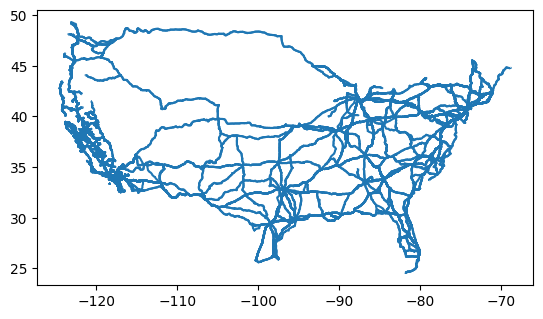

In [53]:
routes.plot()

In [28]:
print(type(rail_routes))
print(rail_routes.shape)
print(rail_routes.geometry.name)

rail_routes.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
(209, 10)
geometry


,org_id,agency,route_id,route_type,route_name,shape_id,n_trips,base64_url,uri,geometry
0,recKsb5FnJy70up78,Amtrak,36921,2,Empire Service,245,6,aHR0cHM6Ly9jb250ZW50LmFtdHJhay5jb20vY29udGVudC...,https://content.amtrak.com/content/gtfs/GTFS.zip,"LINESTRING (-73.74115 42.64103, -73.74159 42.6..."
1,recKsb5FnJy70up78,Amtrak,36921,2,Empire Service,248,6,aHR0cHM6Ly9jb250ZW50LmFtdHJhay5jb20vY29udGVudC...,https://content.amtrak.com/content/gtfs/GTFS.zip,"LINESTRING (-73.99446 40.75033, -74.00083 40.7..."
2,recKsb5FnJy70up78,Amtrak,36921,2,Empire Service,279,2,aHR0cHM6Ly9jb250ZW50LmFtdHJhay5jb20vY29udGVudC...,https://content.amtrak.com/content/gtfs/GTFS.zip,"LINESTRING (-73.99446 40.75033, -74.00083 40.7..."
3,recKsb5FnJy70up78,Amtrak,36921,2,Empire Service,280,2,aHR0cHM6Ly9jb250ZW50LmFtdHJhay5jb20vY29udGVudC...,https://content.amtrak.com/content/gtfs/GTFS.zip,"LINESTRING (-79.03186 43.11355, -79.03157 43.1..."
4,recKsb5FnJy70up78,Amtrak,36922,2,Capitol Limited,238,1,aHR0cHM6Ly9jb250ZW50LmFtdHJhay5jb20vY29udGVudC...,https://content.amtrak.com/content/gtfs/GTFS.zip,"LINESTRING (-77.00642 38.89699, -76.99970 38.9..."


<AxesSubplot:>

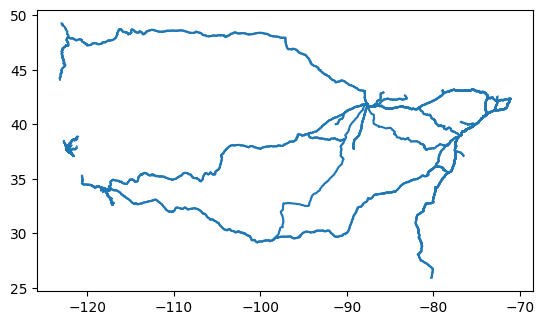

In [54]:
rail_routes.plot()

In [29]:
print(type(stops))
print(stops.shape)
print(stops.geometry.name)
stops.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
(119968, 9)
geometry


,org_id,agency,route_id,route_type,stop_id,stop_name,base64_url,uri,geometry
0,recNaKvzVQhGX1puu,City of Alhambra,BlueLine,3,2619798,Chapel Ave & Bay St,aHR0cHM6Ly9naXRodWIuY29tL0xBQ01UQS9sb3MtYW5nZW...,https://github.com/LACMTA/los-angeles-regional...,POINT (-118.12232 34.09485)
1,recNaKvzVQhGX1puu,City of Alhambra,BlueLine,3,2619799,Chapel Ave & Main St,aHR0cHM6Ly9naXRodWIuY29tL0xBQ01UQS9sb3MtYW5nZW...,https://github.com/LACMTA/los-angeles-regional...,POINT (-118.12338 34.09636)
2,recNaKvzVQhGX1puu,City of Alhambra,BlueLine,3,2619802,Chapel Ave & Woodward Ave,aHR0cHM6Ly9naXRodWIuY29tL0xBQ01UQS9sb3MtYW5nZW...,https://github.com/LACMTA/los-angeles-regional...,POINT (-118.12529 34.09908)
3,recNaKvzVQhGX1puu,City of Alhambra,BlueLine,3,2619804,Woodward Ave & Garfield Ave,aHR0cHM6Ly9naXRodWIuY29tL0xBQ01UQS9sb3MtYW5nZW...,https://github.com/LACMTA/los-angeles-regional...,POINT (-118.12824 34.09790)
4,recNaKvzVQhGX1puu,City of Alhambra,BlueLine,3,2619807,Garfield Ave & Main St,aHR0cHM6Ly9naXRodWIuY29tL0xBQ01UQS9sb3MtYW5nZW...,https://github.com/LACMTA/los-angeles-regional...,POINT (-118.12705 34.09530)


<AxesSubplot:>

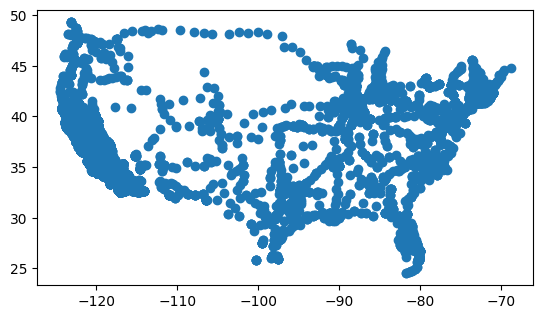

In [55]:
stops.plot()

In [30]:
print(type(rail_stops))
print(rail_stops.shape)
print(rail_stops.geometry.name)
rail_stops.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
(2045, 9)
geometry


,org_id,agency,route_id,route_type,stop_id,stop_name,base64_url,uri,geometry
0,recKsb5FnJy70up78,Amtrak,11317,2,FMT,Fremont,aHR0cHM6Ly9jb250ZW50LmFtdHJhay5jb20vY29udGVudC...,https://content.amtrak.com/content/gtfs/GTFS.zip,POINT (-122.00750 37.55909)
1,recKsb5FnJy70up78,Amtrak,11317,2,GAC,Santa Clara Great America Amtrak,aHR0cHM6Ly9jb250ZW50LmFtdHJhay5jb20vY29udGVudC...,https://content.amtrak.com/content/gtfs/GTFS.zip,POINT (-121.96700 37.40678)
2,recKsb5FnJy70up78,Amtrak,11317,2,LIV,Livermore Amtrak Bus Stop,aHR0cHM6Ly9jb250ZW50LmFtdHJhay5jb20vY29udGVudC...,https://content.amtrak.com/content/gtfs/GTFS.zip,POINT (-121.76712 37.68491)
3,recKsb5FnJy70up78,Amtrak,11317,2,LTM,Lathrop-Manteca Amtrak Station,aHR0cHM6Ly9jb250ZW50LmFtdHJhay5jb20vY29udGVudC...,https://content.amtrak.com/content/gtfs/GTFS.zip,POINT (-121.26366 37.79836)
4,recKsb5FnJy70up78,Amtrak,11317,2,PLS,Pleasanton Amtrak Station,aHR0cHM6Ly9jb250ZW50LmFtdHJhay5jb20vY29udGVudC...,https://content.amtrak.com/content/gtfs/GTFS.zip,POINT (-121.88264 37.65815)


<AxesSubplot:>

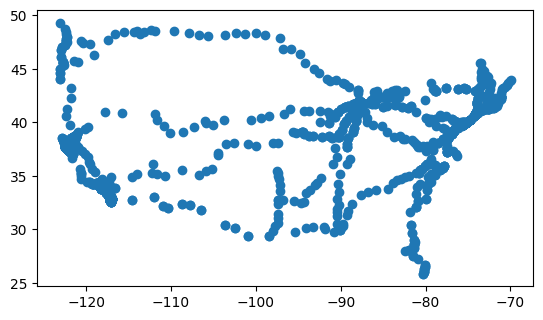

In [56]:
rail_stops.plot()

---

## Cleaning

---

In [37]:
# projected CRS to 2229
districts2229 = districts.to_crs('EPSG:2229')
highways2229 = highways.to_crs('EPSG:2229')
routes2229 = routes.to_crs('EPSG:2229')
rail_routes2229 = rail_routes.to_crs('EPSG:2229')
stops2229 = stops.to_crs('EPSG:2229')
rail_stops2229 = rail_stops.to_crs('EPSG:2229')



In [ ]:
# dissolve district to single CA map

#